In [7]:
## Importanto a biblioteca Pandas para leitura dos dados
import pandas as pd

## Importando os dados em formato CSV para um dataframe Pandas
prices = pd.read_csv("sample_prices.csv")

In [8]:
## A função pct_change() na biblioteca pandas do Python é utilizada
## para calcular a alteração percentual entre elementos consecutivos
## numa Série ou DataFrame. Calcula a alteração percentual para cada
## elemento dividindo a diferença entre o elemento atual e o elemento
## anterior pelo elemento anterior.
returns = prices.pct_change()

## Remove o NaN do primeiro elemento, onde não há um retorno.
returns = returns.dropna()

## Imprime o dataframe
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [9]:
## A função std() na biblioteca pandas do Python
## é utilizada para calcular o desvio padrão de
## uma Série ou DataFrame.
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [10]:
import numpy as np

deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()
volatility = np.sqrt(variance)
print(volatility)

BLUE      0.022957
ORANGE    0.076212
dtype: float64


Por que esses números não coincidem? Bem, a diferença é que o desvio padrão usa um numerador que é n menos 1, enquanto aqui estamos usando um numerador que é n. Em outras palavras, quando você calcula a média, você está dividindo a soma pelo número total de observações, enquanto que quando você está fazendo o desvio padrão, se você se lembra de suas estatísticas, você divide por n menos 1, não n, e isso porque o que estamos fazendo aqui é que estamos calculando a amostra desvio padrão.

In [11]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
number_of_obs = returns.shape[0]
variance = squared_deviations.sum()/(number_of_obs - 1)
volatility = np.sqrt(variance)
print(volatility)

BLUE      0.023977
ORANGE    0.079601
dtype: float64


Você multiplica pela raiz quadrada do número de períodos em um ano. Então, neste exemplo, são dados mensais, então por que você os multiplicaria? Você multiplicaria pela raiz quadrada de 12. Por quê? Porque há 12 meses em um ano e estamos tentando obter a volatilidade anual ou anual.

In [12]:
returns.std()*(12**0.5)
print(returns)

        BLUE    ORANGE
1   0.023621  0.039662
2  -0.021807 -0.033638
3  -0.031763  0.082232
4   0.034477  0.044544
5   0.037786 -0.026381
6  -0.011452 -0.049187
7   0.032676  0.117008
8  -0.012581  0.067353
9   0.029581  0.078249
10  0.006151 -0.168261
11  0.012162  0.024041
12  0.021149 -0.055623


### Argumentos passados:

*   header=0: Este argumento especifica que a primeira linha do ficheiro CSV contém os nomes das colunas.
*   index_col=0: Este argumento especifica que a primeira coluna do ficheiro CSV deve ser utilizada como o índice para o DataFrame.
*   parse_dates=True: Este argumento diz ao pandas para tentar analisar os valores na coluna de índice como datas.




In [14]:
returns = pd.read_csv("/content/Portfolios_Formed_on_ME_monthly_EW.csv",
                      header=0, index_col=0, parse_dates=True, na_values=-99.99)
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


Então, vou dizer que as colunas são, e vou dar a elas uma lista de colunas nas quais estamos interessados. Então, o primeiro que nos preocupa é o Lo 10 e o outro é o Hi 10. Então, esses são os nomes das colunas que realmente me interessam. Então, tudo o mais que vou eliminar, então vou dizer que as devoluções são atribuídas às colunas de devoluções.

In [16]:
columns=['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


Os valores da tabela estão multiplicados por 100, representando neste caso 3.29\%.

In [17]:
# Voltando para o valor decimal:
returns = returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


Podemos renomear os portfolios alterando o nome de suas colunas.

In [19]:
returns.columns = ['Small Cap', 'Large Cap']
returns.head()

,Small Cap,Large Cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<Axes: >

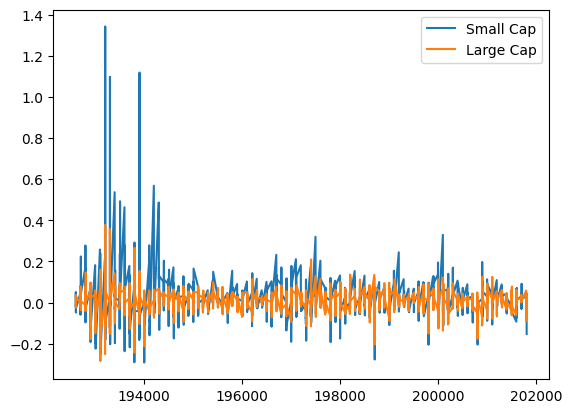

In [20]:
returns.plot.line()

In [22]:
# Capturando o Desvio Padrão:
# Você pode ver que o desvio padrão dos retornos da capitalização pequena é quase
# o dobro do desvio padrão da capitalização grande.
returns.std()

Small Cap    0.106288
Large Cap    0.053900
dtype: float64

O que podemos fazer é anualizar isso, então lembre-se de que o volume anualizado é o quê? Ele retorna o desvio padrão e, em seguida, o que
você quer  fazer? Você quer multiplicar isso pela raiz quadrada de 12. Por que 12? Porque são retornos mensais.

In [24]:
annualized_vol = returns.std()*(12**0.5)
annualized_vol

Small Cap    0.368193
Large Cap    0.186716
dtype: float64

In [26]:
# Então esse é o retorno total de todos os meses
return_per_month = (returns+1).prod()
return_per_month

Small Cap    1.659583e+06
Large Cap    3.675948e+03
dtype: float64

Mas queremos a devolução por mês, para poder fazer isso, temos que saber quantos meses temos, então o que você faria é se soubesse o número de meses, tudo o que você faria seria elevá-lo para um dividido por, digamos, n meses.

In [29]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

Small Cap    0.012986
Large Cap    0.007423
dtype: float64

Você pode pensar nisso como quase o inverso da anualização. Você recebeu um retorno durante todo o período, agora você quer olhar para trás e dizer: qual é o retorno por mês que teria me dado esse retorno durante todo o período? Então, é claro, esse é o retorno desse formato 1 mais R, e você deseja subtrair um desse formato.

In [30]:
annualized_return = (return_per_month+1)**12-1
annualized_return

Small Cap    0.167463
Large Cap    0.092810
dtype: float64

In [32]:
# Como calcular o retorno anual de uma vez:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

Small Cap    0.167463
Large Cap    0.092810
dtype: float64

Agora finalmente podemos calcular a relação risco/retorno.

In [33]:
# Relação RISCO vs RETORNO (divisão entre os Retornos pela volatilidade)
risk_return = annualized_return/annualized_vol

Small Cap    0.454825
Large Cap    0.497063
dtype: float64

Calculando agora o Índice de Sharpe:

In [35]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

Small Cap    0.373346
Large Cap    0.336392
dtype: float64